In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns

In [7]:
datos=pd.read_csv("C:/Users/maria/OneDrive/Escritorio/wine.data",
                header=None,
                names=["Clase","Alcohol","Ac. Malico","Cenizas","Alc. Cenizas","Magnesio","Total Fenoles","Flavonoides","Fenoles No-Flavonoides","Proantocianinas","Intensidad Color","Tono","DO280/OD315 de vinos diluidos","Prolina"])

In [8]:
datos

,Clase,Alcohol,Ac. Malico,Cenizas,Alc. Cenizas,Magnesio,Total Fenoles,Flavonoides,Fenoles No-Flavonoides,Proantocianinas,Intensidad Color,Tono,DO280/OD315 de vinos diluidos,Prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
datos.describe()

,Clase,Alcohol,Ac. Malico,Cenizas,Alc. Cenizas,Magnesio,Total Fenoles,Flavonoides,Fenoles No-Flavonoides,Proantocianinas,Intensidad Color,Tono,DO280/OD315 de vinos diluidos,Prolina
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

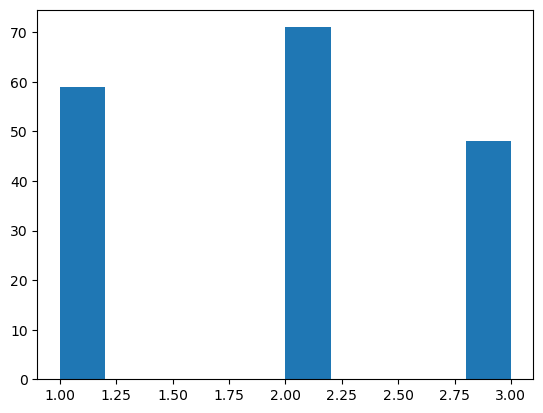

In [10]:
plt.hist(datos.Clase)

In [11]:
#Separacion de columnas
predictors_col =["Alcohol","Ac. Malico","Cenizas","Alc. Cenizas","Magnesio","Total Fenoles","Flavonoides","Fenoles No-Flavonoides","Proantocianinas","Intensidad Color","Tono","DO280/OD315 de vinos diluidos","Prolina"]
target_col = ["Clase"]

In [12]:
predictor = datos[predictors_col]
target = datos[target_col]

In [13]:
#Separar datos en train (80%) y test (20%) 
x_train, x_test, y_train, y_test = train_test_split(predictor, target, test_size=0.2, random_state=13)

In [14]:
tree = DecisionTreeClassifier()

In [15]:
arboldec = tree.fit(x_train, y_train)

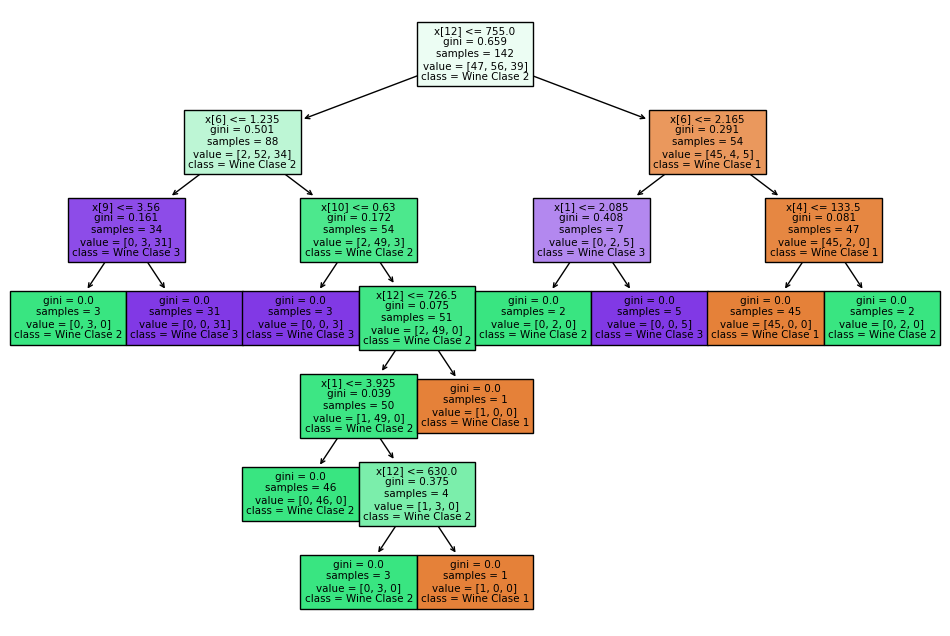

In [16]:
clases = ['Wine Clase 1', 'Wine Clase 2', 'Wine Clase 3']
plt.figure(figsize=(12,8))
plot_tree(arboldec, filled=True, class_names=clases)
plt.show()

In [17]:
#Predicciones
predicciones = arboldec.predict(x_test)

In [18]:
#Matriz de Confusion
conf_matrix = confusion_matrix(y_test, predicciones)

Text(0.5, 1.0, 'Matriz de Confusión')

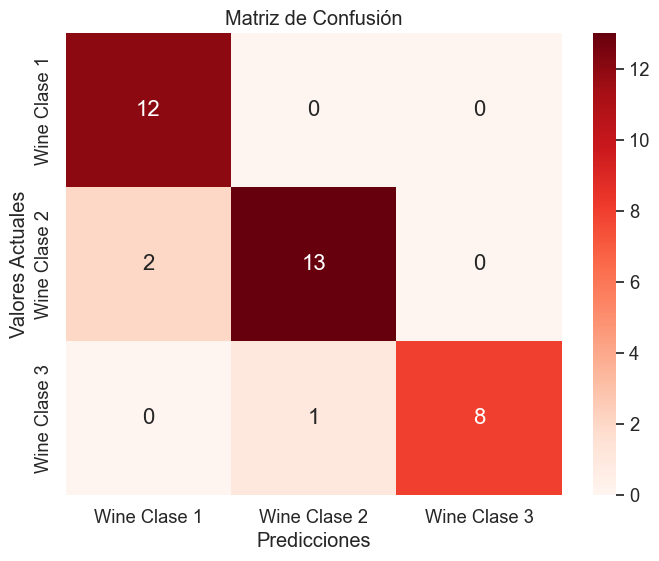

In [24]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", annot_kws={"size": 16},xticklabels=clases, yticklabels=clases)
plt.xlabel('Predicciones')
plt.ylabel('Valores Actuales')
plt.title('Matriz de Confusión')

In [25]:
accuracy = accuracy_score(y_test, predicciones)
precision_none = precision_score(y_test, predicciones, average=None)
precision_macro = precision_score(y_test, predicciones, average='macro')
recall_none = recall_score(y_test, predicciones, average=None)
recall_macro = recall_score(y_test, predicciones, average='macro')
f1_none = f1_score(y_test, predicciones, average=None)
f1_macro = f1_score(y_test, predicciones, average='macro')

print("Metricas de rendimiento del modelo")

print("")
print(f'Exactitud: {accuracy * 100:.1f}%')

print("")
for i, precision in enumerate(precision_none):
    class_name = clases[i]
    print(f'Precisión para {class_name}: {precision * 100:.1f}%')    
print(f"Precisión (promedio): {precision_macro * 100:.1f}%")    

print("")    
for i, recall in enumerate(recall_none):
    class_name = clases[i]
    print(f'Recall para {class_name}: {recall * 100:.1f}%')    
print(f"Recall (promedio): {recall_macro * 100:.1f}%")   


print("")    
for i, f1 in enumerate(f1_none):
    class_name = clases[i]
    print(f'F1 Score para {class_name}: {f1 * 100:.1f}%')    
print(f"F1 Score (promedio): {f1_macro * 100:.1f}%")   

Metricas de rendimiento del modelo

Exactitud: 91.7%

Precisión para Wine Clase 1: 85.7%
Precisión para Wine Clase 2: 92.9%
Precisión para Wine Clase 3: 100.0%
Precisión (promedio): 92.9%

Recall para Wine Clase 1: 100.0%
Recall para Wine Clase 2: 86.7%
Recall para Wine Clase 3: 88.9%
Recall (promedio): 91.9%

F1 Score para Wine Clase 1: 92.3%
F1 Score para Wine Clase 2: 89.7%
F1 Score para Wine Clase 3: 94.1%
F1 Score (promedio): 92.0%
